Тема: "Анализ гаромонизированного индекса потребительских цен в странах всего мира на товары продовольствия и здравоохранение"
HICP - Гармонизированный индекс потребительских цен, благодаря показателям которого мы сможем провести четкий анализ экономического состояния 117 стран на текущий месяц. Основной целью в данном исследовании считаю выявление страны с самой плачевной экономической ситуацей ( Страна может быть не самой кризисной, так как в датафреймах будут присутствовать не все страны мира )


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('/content/drive/MyDrive/Health.csv')
df1.head(1405)

,DATAFLOW,LAST UPDATE,freq,coicop,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,I15,AT,2020-12,110.07,NaN
1,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,I15,AT,2021-01,110.37,NaN
2,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,I15,AT,2021-02,110.91,NaN
3,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,I15,AT,2021-03,111.00,NaN
4,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,I15,AT,2021-04,111.34,NaN
...,...,...,...,...,...,...,...,...,...
1399,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,PCH_M12,US,2021-07,1.70,d
1400,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,PCH_M12,US,2021-08,2.00,d
1401,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,PCH_M12,US,2021-09,2.00,d
1402,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,PCH_M12,US,2021-10,2.50,d


In [ ]:
import pandas as pd
df2 = pd.read_csv('/content/drive/MyDrive/Education.csv')
df2.head(1405)

,DATAFLOW,LAST UPDATE,freq,coicop,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,I15,AT,2020-12,112.53,NaN
1,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,I15,AT,2021-01,112.54,NaN
2,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,I15,AT,2021-02,112.58,NaN
3,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,I15,AT,2021-03,112.70,NaN
4,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,I15,AT,2021-04,112.73,NaN
...,...,...,...,...,...,...,...,...,...
1399,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,PCH_M12,US,2021-07,1.10,d
1400,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,PCH_M12,US,2021-08,1.40,d
1401,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,PCH_M12,US,2021-09,2.00,d
1402,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,PCH_M12,US,2021-10,2.10,d


Для проведения нашего исследования нас интересуют только названия стран, индекс цен и период оценивания, поэтому удалим столбцы, которые не входят в наше исследование.

In [ ]:
df1.drop(["DATAFLOW", "LAST UPDATE", "freq", "coicop", "unit","OBS_FLAG"], axis = 1, inplace = True)
df1

NameError: ignored

Для начала оставим только актуальную дату в наших дата фреймах (2021-11), а также будем рассматривать мень

In [ ]:
df1 = df1[df1["TIME_PERIOD"].str.contains("2021-11")]

Оставляем строчки содержащие только 2021-11

In [ ]:
top_22 = df1.sort_values(by = 'OBS_VALUE', ascending=False).head(22)
top_22

,geo,TIME_PERIOD,OBS_VALUE
455,TR,2021-11,226.30
239,HU,2021-11,125.25
287,LT,2021-11,123.49
71,CZ,2021-11,122.50
311,LV,2021-11,119.91
143,EE,2021-11,118.00
371,PL,2021-11,116.50
467,US,2021-11,115.12
359,NO,2021-11,115.00
407,RS,2021-11,114.70


Формируем первые 22 значения

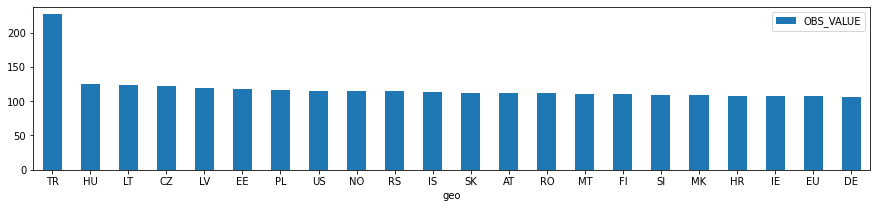

In [ ]:
top_22.plot(x = 'geo', y = "OBS_VALUE", kind = 'bar', rot = 0, fontsize = 5)
plt.rcParams['font.size'] = 20
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

По полученному графику можно сделать вывод, что HICP самый высокий и самый выделяющийся на фоне других стран в Турции. Это вполне соответствует действительности, так как 12 декабря Турецкая лира побила новый антирекорд и стала стоить 15 лир за 1 доллар США. Данный анализ мы проводили в сфере здравоохранения, поэтому для создания более четкой экономической картины проанализируем идентичный индекс только в сфере образования. Проведём идентичные преобразования дата фрейма для получения необходимого результата.


In [ ]:
df2.drop(["DATAFLOW", "LAST UPDATE", "freq", "coicop", "unit","OBS_FLAG"], axis = 1, inplace = True)
df2

,geo,TIME_PERIOD,OBS_VALUE
0,AT,2020-12,112.53
1,AT,2021-01,112.54
2,AT,2021-02,112.58
3,AT,2021-03,112.70
4,AT,2021-04,112.73
...,...,...,...
1399,US,2021-07,1.10
1400,US,2021-08,1.40
1401,US,2021-09,2.00
1402,US,2021-10,2.10


Удаляем лишние столбцы

In [ ]:
df2 = df2[df2["TIME_PERIOD"].str.contains("2021-11")]

In [ ]:
top_22_1 = df2.sort_values(by = 'OBS_VALUE', ascending=False).head(22)
top_22_1

,geo,TIME_PERIOD,OBS_VALUE
455,TR,2021-11,197.15
287,LT,2021-11,135.23
359,NO,2021-11,127.60
23,BE,2021-11,127.57
35,BG,2021-11,125.97
299,LU,2021-11,120.57
371,PL,2021-11,120.40
95,DK,2021-11,119.40
395,RO,2021-11,118.72
239,HU,2021-11,118.34


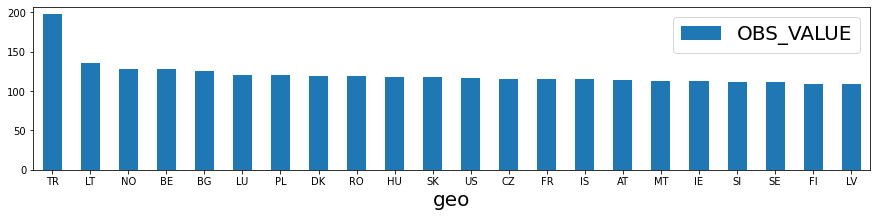

In [ ]:
top_22_1.plot(x = 'geo', y = "OBS_VALUE", kind = 'bar', rot = 0, fontsize = 5)
plt.rcParams['font.size'] = 20
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

По полученным данным можно сделать вывод, что Турция действительно переживает кризис, поэтому стоит акцентировать внимание именно на этой стране и провести её анализ за последние 12 месяцев. Для начала рассмотрим сфера здравоохранения.


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Health.csv')
df1.head(1405)

,DATAFLOW,LAST UPDATE,freq,coicop,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,I15,AT,2020-12,110.07,NaN
1,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,I15,AT,2021-01,110.37,NaN
2,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,I15,AT,2021-02,110.91,NaN
3,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,I15,AT,2021-03,111.00,NaN
4,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,I15,AT,2021-04,111.34,NaN
...,...,...,...,...,...,...,...,...,...
1399,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,PCH_M12,US,2021-07,1.70,d
1400,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,PCH_M12,US,2021-08,2.00,d
1401,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,PCH_M12,US,2021-09,2.00,d
1402,ESTAT:TEICP060(1.0),17/12/21 11:00:00,M,CP06,PCH_M12,US,2021-10,2.50,d


In [ ]:
df1.drop(["DATAFLOW", "LAST UPDATE", "freq", "coicop", "unit","OBS_FLAG"], axis = 1, inplace = True)
df1

,geo,TIME_PERIOD,OBS_VALUE
0,AT,2020-12,110.07
1,AT,2021-01,110.37
2,AT,2021-02,110.91
3,AT,2021-03,111.00
4,AT,2021-04,111.34
...,...,...,...
1399,US,2021-07,1.70
1400,US,2021-08,2.00
1401,US,2021-09,2.00
1402,US,2021-10,2.50


In [ ]:
TR_HEALTH = df1.sort_values(by = 'OBS_VALUE', ascending=False).head(12)
TR_HEALTH

,geo,TIME_PERIOD,OBS_VALUE
455,TR,2021-11,226.30
454,TR,2021-10,224.33
453,TR,2021-09,222.90
452,TR,2021-08,221.74
451,TR,2021-07,221.05
450,TR,2021-06,220.14
449,TR,2021-05,218.40
448,TR,2021-04,217.75
447,TR,2021-03,216.54
446,TR,2021-02,208.81


Сортируем по убыванию 

Text(0.5, 1.0, 'HICP в Турции за последние 12 лет')

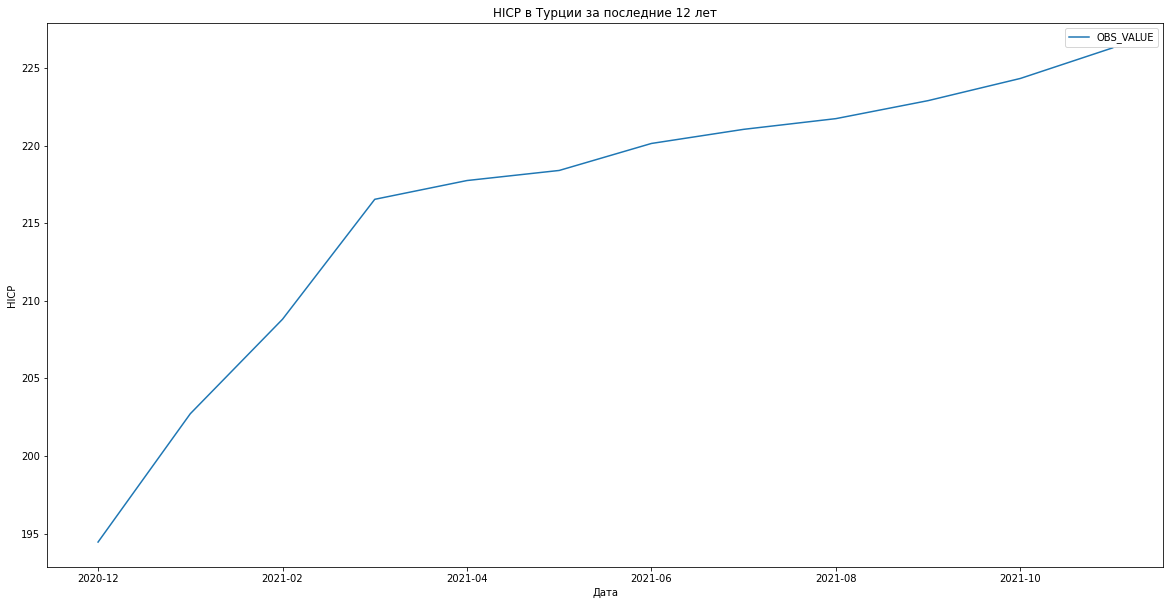

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
TR_HEALTH.pivot_table(values='OBS_VALUE',index ='TIME_PERIOD',fill_value=None,margins = False,dropna= True).plot()
plt.ylabel('HICP')
plt.xlabel('Дата')
plt.title('HICP в Турции за последние 12 лет')

По данной функции можно заметить, что кризис в Турции начался ещё в начале 2021 года, а далее экономиечская ситуация все только ухудшалась и наданный момент достигает своего плачевного максиума за рассматриваемый период. На основе здравоохранения рассмотрим сектор образования.

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Education.csv')
df2.head(1405)

,DATAFLOW,LAST UPDATE,freq,coicop,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,I15,AT,2020-12,112.53,NaN
1,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,I15,AT,2021-01,112.54,NaN
2,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,I15,AT,2021-02,112.58,NaN
3,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,I15,AT,2021-03,112.70,NaN
4,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,I15,AT,2021-04,112.73,NaN
...,...,...,...,...,...,...,...,...,...
1399,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,PCH_M12,US,2021-07,1.10,d
1400,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,PCH_M12,US,2021-08,1.40,d
1401,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,PCH_M12,US,2021-09,2.00,d
1402,ESTAT:TEICP100(1.0),17/12/21 11:00:00,M,CP10,PCH_M12,US,2021-10,2.10,d


In [ ]:
df2.drop(["DATAFLOW", "LAST UPDATE", "freq", "coicop", "unit","OBS_FLAG"], axis = 1, inplace = True)
df2

,geo,TIME_PERIOD,OBS_VALUE
0,AT,2020-12,112.53
1,AT,2021-01,112.54
2,AT,2021-02,112.58
3,AT,2021-03,112.70
4,AT,2021-04,112.73
...,...,...,...
1399,US,2021-07,1.10
1400,US,2021-08,1.40
1401,US,2021-09,2.00
1402,US,2021-10,2.10



Удаляем лишние столбцы



In [ ]:
TR_EDUCATION = df2.sort_values(by = 'OBS_VALUE', ascending=False).head(12)
TR_EDUCATION

,geo,TIME_PERIOD,OBS_VALUE
455,TR,2021-11,197.15
454,TR,2021-10,196.99
453,TR,2021-09,196.65
452,TR,2021-08,187.02
451,TR,2021-07,185.94
450,TR,2021-06,183.17
449,TR,2021-05,179.22
448,TR,2021-04,178.14
447,TR,2021-03,174.50
446,TR,2021-02,169.79


Сортируем по убыванию

Text(0.5, 1.0, 'HICP по образованию в Турции за последние 12 лет')

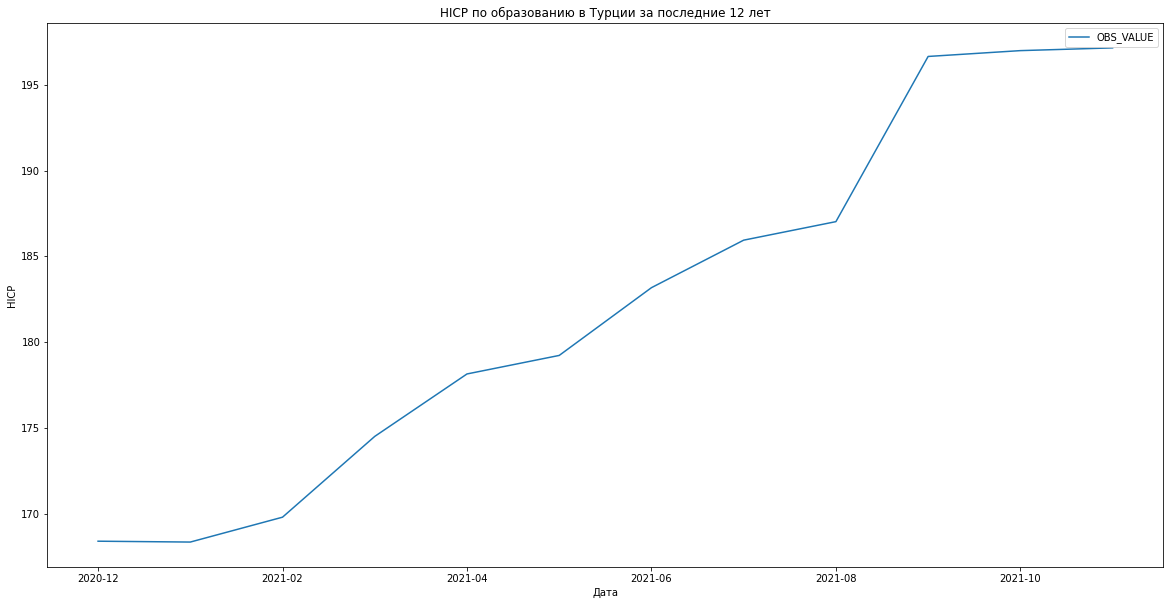

In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
TR_EDUCATION.pivot_table(values='OBS_VALUE',index ='TIME_PERIOD',fill_value=None,margins = False,dropna= True).plot()
plt.ylabel('HICP')
plt.xlabel('Дата')
plt.title('HICP по образованию в Турции за последние 12 лет')

Данный график подтверждает выводы, которые мы составили по HICP по здравоохранению, но в данном случае ситуация более положительная, так как реактивный рост индекса прослеживается только к концу года, а на протяжении всего остального времени идёт более менее умеренный рост.

In [ ]:
TR_EDUCATION.drop(["geo", "TIME_PERIOD"], axis = 1, inplace = True)
TR_EDUCATION

,OBS_VALUE
455,197.15
454,196.99
453,196.65
452,187.02
451,185.94
450,183.17
449,179.22
448,178.14
447,174.50
446,169.79


Оставляем только столбец с индексами

In [ ]:
TR_EDUCATION.rename(columns={'OBS_VALUE': 'OBS_EDUCATION'}, inplace=True)
TR_EDUCATION

,OBS_EDUCATION
455,197.15
454,196.99
453,196.65
452,187.02
451,185.94
450,183.17
449,179.22
448,178.14
447,174.50
446,169.79


Переименовываем столбец в OBS_EDUCATION


In [ ]:

df12 = pd.concat([TR_HEALTH, TR_EDUCATION], axis = 1)
df12

,geo,TIME_PERIOD,OBS_VALUE,OBS_EDUCATION
444,TR,2020-12,194.45,168.39
445,TR,2021-01,202.72,168.34
446,TR,2021-02,208.81,169.79
447,TR,2021-03,216.54,174.50
448,TR,2021-04,217.75,178.14
449,TR,2021-05,218.40,179.22
450,TR,2021-06,220.14,183.17
451,TR,2021-07,221.05,185.94
452,TR,2021-08,221.74,187.02
453,TR,2021-09,222.90,196.65


Объединяем два датафрейма

In [ ]:
df12.rename(columns={'OBS_VALUE': 'OBS_HEALTH'}, inplace=True)
df12

,geo,TIME_PERIOD,OBS_HEALTH,OBS_EDUCATION
444,TR,2020-12,194.45,168.39
445,TR,2021-01,202.72,168.34
446,TR,2021-02,208.81,169.79
447,TR,2021-03,216.54,174.50
448,TR,2021-04,217.75,178.14
449,TR,2021-05,218.40,179.22
450,TR,2021-06,220.14,183.17
451,TR,2021-07,221.05,185.94
452,TR,2021-08,221.74,187.02
453,TR,2021-09,222.90,196.65


Переименуем столбец OBS_VALUE в OBS_HEALTH

In [ ]:
df12 = df12.sort_values(by = 'TIME_PERIOD', ascending=True).head(12)
df12

,geo,TIME_PERIOD,OBS_HEALTH,OBS_EDUCATION
444,TR,2020-12,194.45,168.39
445,TR,2021-01,202.72,168.34
446,TR,2021-02,208.81,169.79
447,TR,2021-03,216.54,174.50
448,TR,2021-04,217.75,178.14
449,TR,2021-05,218.40,179.22
450,TR,2021-06,220.14,183.17
451,TR,2021-07,221.05,185.94
452,TR,2021-08,221.74,187.02
453,TR,2021-09,222.90,196.65


Отсортируем общий датафрейм по дате

Text(0.5, 1.0, 'График HICP турции по образованию и по здравоохранению')

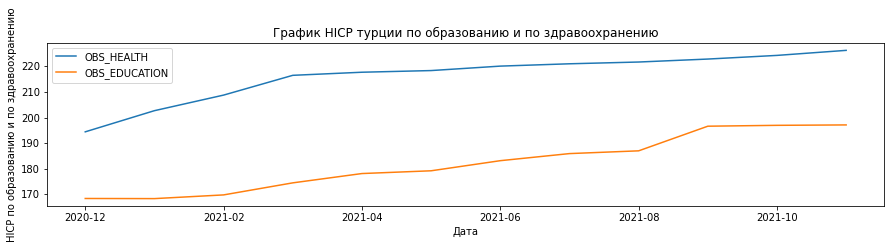

In [ ]:
plt.close()
plt.rcParams["figure.figsize"] = (15,3)
df12.plot(x="TIME_PERIOD", y=["OBS_HEALTH", "OBS_EDUCATION"])
plt.ylabel('HICP по образованию и по здравоохранению')
plt.xlabel('Дата')
plt.title('График HICP турции по образованию и по здравоохранению')

Вот мы и дошли до итогового графика, на котором содержится и Education HICP и HEALTH HICP. По нему можно сделать вывод, что при кризисе в стране в первую очередь страдает показатель здравоохранения, а только после образования (если сравнивать из двух). Также можно заметить, что показатель Здоровья в начале года находится на сопоставимом уровне с показателем Образования. На основе полученных данных можно сделать вывод, что Турция - страна с самой плачевной экономической ситуацией, а также вывод о том, что медицина пострадала в первую очередь. 